In [76]:
%matplotlib

Using matplotlib backend: Qt5Agg


## Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns

#import sklearn to use linear regression algorithm to build model
from sklearn.linear_model import LinearRegression

#import sklearn to use decision tree regression algorithm to build model
from sklearn.tree import DecisionTreeRegressor

#Import Random Forest
from sklearn.ensemble import RandomForestRegressor

#Import Support Vector Machine
from sklearn import svm

#Import KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Import ANN
from sklearn.neural_network import MLPRegressor

#Import Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

#import sklearn to split dataset into train/test datasets
from sklearn.model_selection import train_test_split

#import sklearn to perform k-fold cross validation and evaluation of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from matplotlib.offsetbox import AnchoredText


import pickle

## Import Data

In [78]:
computer = 'sph0088'
training = 'Set 1'
val = 'Set 2'
test = 'Set 3'
test2 = 'Set 4'

file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq.csv'.format(computer)
df = pd.read_csv(file)
df = df[df['tceq_pm25']>=0]
df = df[(df['pm2_5_atm_avg'] < df['pm10_0_atm_avg'])] #filter out abnormal values
df = df[(df['pm1_0_atm_avg'] < (df['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df['p03_p05'] = df['p_0_3_um_avg'] / df['p_0_5_um_avg']
df = df[(df['p03_p05'] < 3.75)] #filter out abnormal values


val_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set2.csv'.format(computer)
df_val = pd.read_csv(val_file)
df_val = df_val[df_val['tceq_pm25']>=0]
df_val = df_val[(df_val['pm2_5_atm_avg'] < df_val['pm10_0_atm_avg'])] #filter out abnormal values
df_val = df_val[(df_val['pm1_0_atm_avg'] < (df_val['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_val['p03_p05'] = df_val['p_0_3_um_avg'] / df_val['p_0_5_um_avg']
df_val = df_val[(df_val['p03_p05'] < 3.75)] #filter out abnormal values
df_val


test_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set3.csv'.format(computer)
df_test = pd.read_csv(test_file)
df_test = df_test[df_test['tceq_pm25']>=0]
df_test = df_test[(df_test['pm2_5_atm_avg'] < df_test['pm10_0_atm_avg'])] #filter out abnormal values
df_test = df_test[(df_test['pm1_0_atm_avg'] < (df_test['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test['p03_p05'] = df_test['p_0_3_um_avg'] / df_test['p_0_5_um_avg']
df_test = df_test[(df_test['p03_p05'] < 3.75)] #filter out abnormal values
df_test

test2_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set4.csv'.format(computer)
df_test2 = pd.read_csv(test2_file)
df_test2 = df_test2[df_test2['tceq_pm25']>=0]
df_test2 = df_test2[(df_test2['pm2_5_atm_avg'] < df_test2['pm10_0_atm_avg'])] #filter out abnormal values
df_test2 = df_test2[(df_test2['pm1_0_atm_avg'] < (df_test2['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test2['p03_p05'] = df_test2['p_0_3_um_avg'] / df_test2['p_0_5_um_avg']
df_test2 = df_test2[(df_test2['p03_p05'] < 3.75)] #filter out abnormal values
print('Set 1', df.shape)
print('Set 2', df_val.shape)
print('Set 3', df_test.shape)
print('Set 4', df_test2.shape)

Set 1 (2739, 17)
Set 2 (2680, 17)
Set 3 (2670, 17)
Set 4 (2452, 17)


## Specify Model Type

In [79]:
model_type = 'MLR'

model = LinearRegression()
# model = KNeighborsRegressor(n_neighbors=4)
# model = RandomForestRegressor(n_estimators = 50, random_state = 42, criterion = 'mae', min_samples_split = 10)
# model = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=200, min_samples_split=2, alpha=0.9)
# model = MLPRegressor(activation='tanh', solver='adam', alpha=0.0001, learning_rate_init=0.001, max_iter=400)

## Filter Variables

In [80]:
p_size = 0.8 #particle size count threshold
threshold = 0.86 #pm2.5:pm10 ratio threshold

## Visualization parameters

In [81]:
tick_size = 11
label_size = 12
title_size = 14
color = 'C0'
color_nd = 'C1'

## Create Filter and Variable Groups

In [82]:
df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

################################### Slice Datasets ##########################################################
#################################### Training Set ##############################################################
#Training
VG1 = df_dust[['pm2_5_atm_avg']]
VG2 = df_dust[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3 = df_dust[['current_temp_f', 'current_humidity', 
            'pm1_0_atm_avg','pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4 = df_dust[['current_temp_f', 'current_humidity', 
            'pm1_0_atm_avg', 'pm2_5_atm_avg', 'pm10_0_atm_avg',
            'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5 = df_dust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6 = df_dust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7 = df_dust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y = df_dust['tceq_pm25']


VG1_nd = df_nodust[['pm2_5_atm_avg']]
VG2_nd = df_nodust[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_nd = df_nodust[['current_temp_f', 'current_humidity', 
            'pm1_0_atm_avg','pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_nd = df_nodust[['current_temp_f', 'current_humidity', 
            'pm1_0_atm_avg', 'pm2_5_atm_avg', 'pm10_0_atm_avg',
            'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_nd = df_nodust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_nd = df_nodust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_nd = df_nodust['tceq_pm25']

In [83]:
df_dust_val = df_val[(df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold)]
df_nodust_val = df_val[~((df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold))]

#################################### Validation Set ##############################################################
#Validation
VG1_val = df_dust_val[['pm2_5_atm_avg']]
VG2_val = df_dust_val[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_val = df_dust_val[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_val = df_dust_val[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_val = df_dust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_val = df_dust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_val = df_dust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_val = df_dust_val['tceq_pm25']


#Validation
VG1_nd_val = df_nodust_val[['pm2_5_atm_avg']]
VG2_nd_val = df_nodust_val[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_nd_val = df_nodust_val[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_nd_val = df_nodust_val[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_nd_val = df_nodust_val['tceq_pm25']

In [84]:
df_dust_test = df_test[(df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold)]
df_nodust_test = df_test[~((df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold))]

#################################### Validation Set ##############################################################
#Validation
VG1_test = df_dust_test[['pm2_5_atm_avg']]
VG2_test = df_dust_test[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_test = df_dust_test[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_test = df_dust_test[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_test = df_dust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_test = df_dust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_test = df_dust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_test = df_dust_test['tceq_pm25']


#Validation
VG1_nd_test = df_nodust_test[['pm2_5_atm_avg']]
VG2_nd_test = df_nodust_test[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_nd_test = df_nodust_test[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_nd_test = df_nodust_test[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_nd_test = df_nodust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_nd_test = df_nodust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_nd_test = df_nodust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_nd_test = df_nodust_test['tceq_pm25']

In [85]:
df_dust_test2 = df_test2[(df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold)]
df_nodust_test2 = df_test2[~((df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold))]

#################################### Validation Set ##############################################################
#Validation
VG1_test2 = df_dust_test2[['pm2_5_atm_avg']]
VG2_test2 = df_dust_test2[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_test2 = df_dust_test2[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_test2 = df_dust_test2[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_test2 = df_dust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_test2 = df_dust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_test2 = df_dust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_test2 = df_dust_test2['tceq_pm25']


#Validation
VG1_nd_test2 = df_nodust_test2[['pm2_5_atm_avg']]
VG2_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity','pm2_5_atm_avg']]
VG3_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
           'pm2_5_atm_avg', 'pm10_0_atm_avg']]
VG4_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity', 'pm1_0_atm_avg',
            'pm2_5_atm_avg', 'pm10_0_atm_avg', 'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG5_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg']]
VG6_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg']]
                ##,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
VG7_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]
Y_nd_test2 = df_nodust_test2['tceq_pm25']

In [91]:
d = {'VG1':VG1, 'VG2':VG2, 'VG3':VG3, 'VG4':VG4,'VG5':VG5, 'VG6':VG6,'VG7':VG7}
d_val = {'VG1':VG1_val, 'VG2':VG2_val, 'VG3':VG3_val, 'VG4':VG4_val,'VG5':VG5_val, 'VG6':VG6_val, 'VG7':VG7_val}
d_test = {'VG1':VG1_test, 'VG2':VG2_test, 'VG3':VG3_test, 'VG4':VG4_test,'VG5':VG5_test, 'VG6':VG6_test, 'VG7':VG7_test}
d_test2 = {'VG1':VG1_test2, 'VG2':VG2_test2, 'VG3':VG3_test2, 'VG4':VG4_test2,'VG5':VG5_test2, 'VG6':VG6_test2, 'VG7':VG7_test2}


d_nd = {'VG1':VG1_nd, 'VG2':VG2_nd, 'VG3':VG3_nd, 'VG4':VG4_nd,'VG5':VG5_nd, 'VG6':VG6_nd,'VG7':VG7_nd}
d_nd_val = {'VG1':VG1_nd_val, 'VG2':VG2_nd_val, 'VG3':VG3_nd_val, 'VG4':VG4_nd_val,'VG5':VG5_nd_val, 'VG6':VG6_nd_val, 'VG7':VG7_nd_val}
d_nd_test = {'VG1':VG1_nd_test, 'VG2':VG2_nd_test, 'VG3':VG3_nd_test, 'VG4':VG4_nd_test,'VG5':VG5_nd_test, 'VG6':VG6_nd_test, 'VG7':VG7_nd_test}
d_nd_test2 = {'VG1':VG1_nd_test2, 'VG2':VG2_nd_test2, 'VG3':VG3_nd_test2, 'VG4':VG4_nd_test2,'VG5':VG5_nd_test2, 'VG6':VG6_nd_test2, 'VG7':VG7_nd_test2}

## Run Dust Models For All Variable Groups

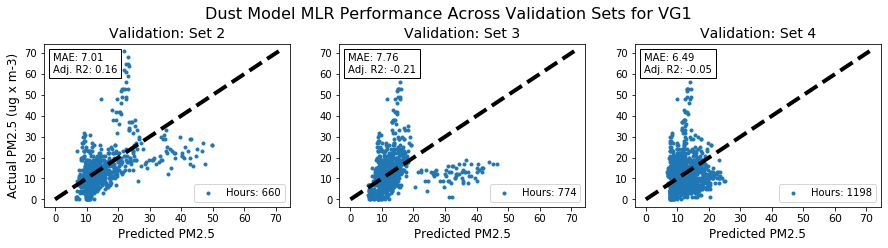

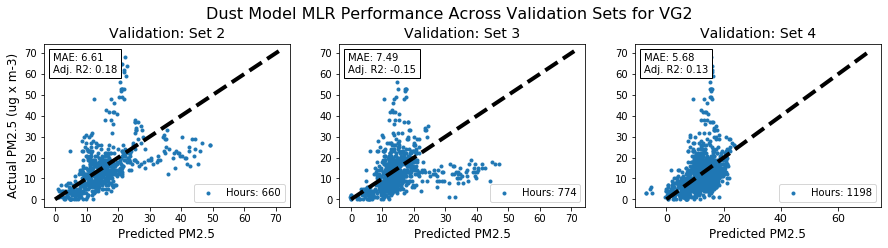

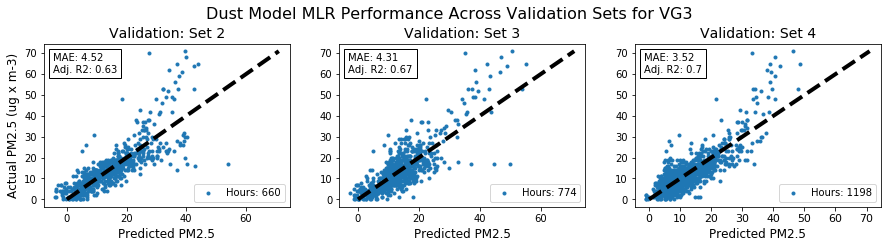

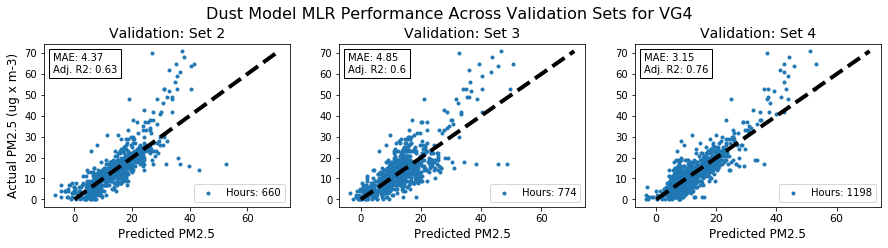

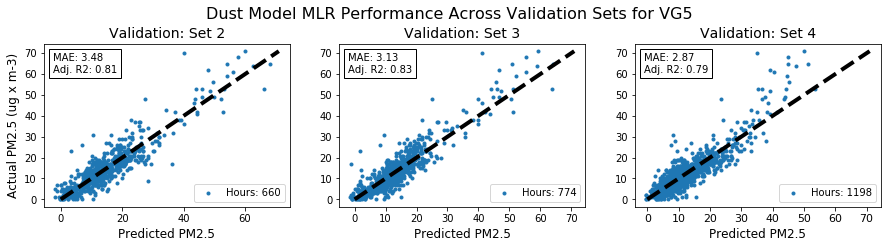

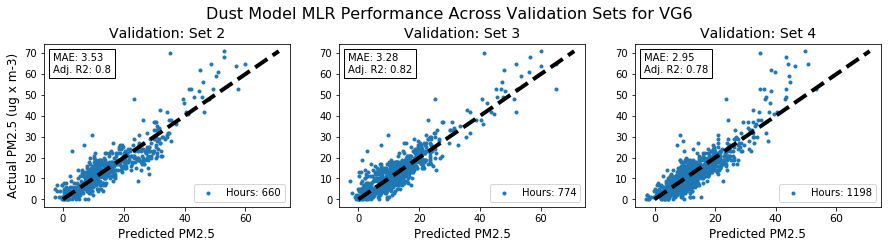

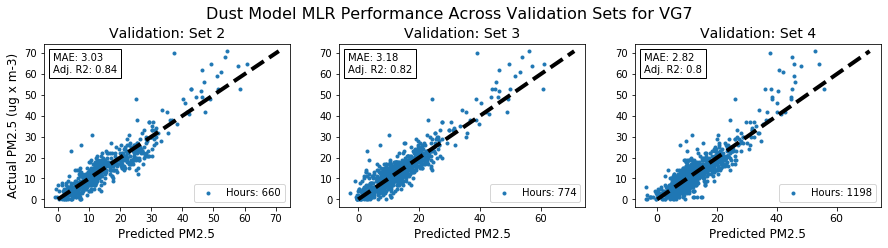

In [93]:
mae_val = []
mae_test = []
mae_test2 = []

r2_val = []
r2_test = []
r2_test2 = []

for key1, variable_group in d.items():
    for key2, variable_group_val in d_val.items():
        if key1 == key2:
            # Fit model and save to file in the current working directory
            trained_model = model.fit(variable_group, Y)
            pkl_filename = r"C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model_{}.pkl".format(key1)
            with open(pkl_filename, 'wb') as file:
                pickle.dump(trained_model, file)

            # Load from file
            with open(pkl_filename, 'rb') as file:
                pickle_model = pickle.load(file)

            fig = plt.figure(figsize=(15,3))
            ax = fig.add_subplot(131)
            ax2 = fig.add_subplot(132)
            ax3 = fig.add_subplot(133)
            fig.suptitle('Dust Model ' + model_type + ' Performance Across Validation Sets for ' + key1, size=16, y=1.05)
            ########################################################################################################
            #Metrics
            predicted = cross_val_predict(pickle_model, variable_group_val, Y_val)
            squared_error = (predicted - Y_val)**2
            sum_squared_error = sum(squared_error)
            predicted_mean = predicted.mean()
            squared_total = (Y_val - predicted_mean)**2
            sum_squared_total = sum(squared_total)
            sum_squared_total
            n = Y_val.shape[0]
            k = variable_group_val.shape[1]

            #Score
            rmse = np.sqrt(sum_squared_error/n)
            RMSE = round(rmse,2)
            Y_mean = Y_val.mean()
            NRMSE = round(RMSE/Y_mean,2)
            r2 = 1 - (sum_squared_error/sum_squared_total)
            R2 = round(r2,2)
            ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
            AR2 = round(ar2,2) 
            MAE = round(sum(abs(predicted - Y_val))/n,2)
            nMAE = round((sum(abs(predicted - Y_val)))/n/Y_mean,2)

            #Plot
            ax.scatter(predicted, Y_val, color=color, label='Hours: ' + str(Y_val.shape[0]), marker='.')
            ax.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=4)
            ax.set_xlabel('Predicted PM2.5', size=label_size)
            ax.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
            ax.set_title('Validation: ' + str(val)
                 , size=title_size)
            anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                 + 'Adj. R2: ' + str(AR2), loc=2)
            ax.add_artist(anchored_text)
            plt.xticks(fontsize=tick_size)
            ax.legend(loc=4)
            
            mae_val.append(nMAE)
            r2_val.append(AR2)
            ###########################################################################################
            for key3, variable_group_test in d_test.items():
                if key1 == key3:
                    #Metrics
                    predicted = cross_val_predict(pickle_model, variable_group_test, Y_test)
                    squared_error = (predicted - Y_test)**2
                    sum_squared_error = sum(squared_error)
                    predicted_mean = predicted.mean()
                    squared_total = (Y_test - predicted_mean)**2
                    sum_squared_total = sum(squared_total)
                    sum_squared_total
                    n = Y_test.shape[0]
                    k = variable_group_test.shape[1]

                    #Score
                    rmse = np.sqrt(sum_squared_error/n)
                    RMSE = round(rmse,2)
                    Y_mean = Y_test.mean()
                    NRMSE = round(RMSE/Y_mean,2)
                    r2 = 1 - (sum_squared_error/sum_squared_total)
                    R2 = round(r2,2)
                    ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
                    AR2 = round(ar2,2) 
                    MAE = round(sum(abs(predicted - Y_test))/n,2)
                    nMAE = round((sum(abs(predicted - Y_test)))/n/Y_mean,2)

                    #Plot
                    ax2.scatter(predicted, Y_test, color=color, label='Hours: ' + str(Y_test.shape[0]), marker='.')
                    ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
                    ax2.set_xlabel('Predicted PM2.5', size=label_size)
#                     ax2.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
                    ax2.set_title('Validation: ' + str(test)
                         , size=title_size)
                    anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                         + 'Adj. R2: ' + str(AR2), loc=2)
                    ax2.add_artist(anchored_text)
                    plt.xticks(fontsize=tick_size)
                    ax2.legend(loc=4)
                    
                    mae_test.append(nMAE)
                    r2_test.append(AR2)

                    ###############################################################################################
                    for key4, variable_group_test2 in d_test2.items():
                        if key1 == key4:
                            #Metrics
                            predicted = cross_val_predict(pickle_model, variable_group_test2, Y_test2)
                            squared_error = (predicted - Y_test2)**2
                            sum_squared_error = sum(squared_error)
                            predicted_mean = predicted.mean()
                            squared_total = (Y_test2 - predicted_mean)**2
                            sum_squared_total = sum(squared_total)
                            sum_squared_total
                            n = Y_test2.shape[0]
                            k = variable_group_test2.shape[1]

                            #Score
                            rmse = np.sqrt(sum_squared_error/n)
                            RMSE = round(rmse,2)
                            Y_mean = Y_test2.mean()
                            NRMSE = round(RMSE/Y_mean,2)
                            r2 = 1 - (sum_squared_error/sum_squared_total)
                            R2 = round(r2,2)
                            ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
                            AR2 = round(ar2,2) 
                            MAE = round(sum(abs(predicted - Y_test2))/n,2)
                            nMAE = round((sum(abs(predicted - Y_test2)))/n/Y_mean,2)

                            #Plot
                            ax3.scatter(predicted, Y_test2, color=color, label='Hours: ' + str(Y_test2.shape[0]), marker='.')
                            ax3.plot([Y_test2.min(), Y_test2.max()], [Y_test2.min(), Y_test2.max()], 'k--', lw=4)
                            ax3.set_xlabel('Predicted PM2.5', size=label_size)
#                             ax3.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
                            ax3.set_title('Validation: ' + str(test2)
                                 , size=title_size)
                            anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                                 + 'Adj. R2: ' + str(AR2), loc=2)
                            ax3.add_artist(anchored_text)
                            plt.xticks(fontsize=tick_size)
                            ax3.legend(loc=4)
                    
                            mae_test2.append(nMAE)
                            r2_test2.append(AR2)
#                             plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\Thesis_Sheets_Docs\dust_{}_{}.png'.format(model_type, key1), bbox_inches='tight')

## Run Non-Dust Models For All Variable Groups

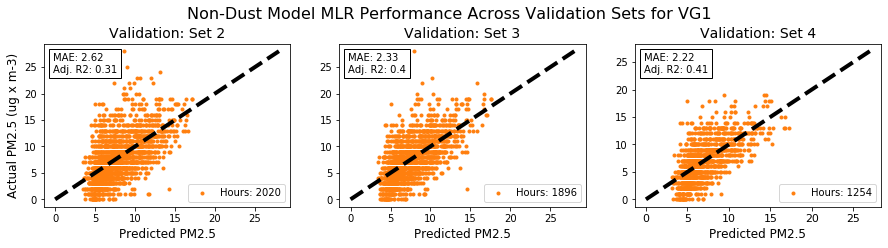

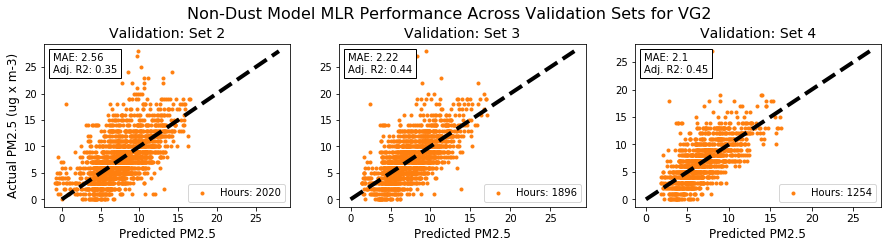

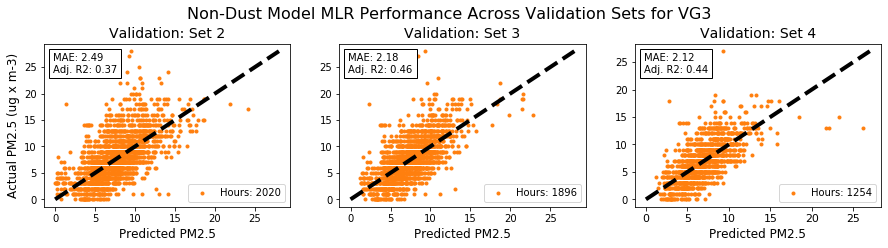

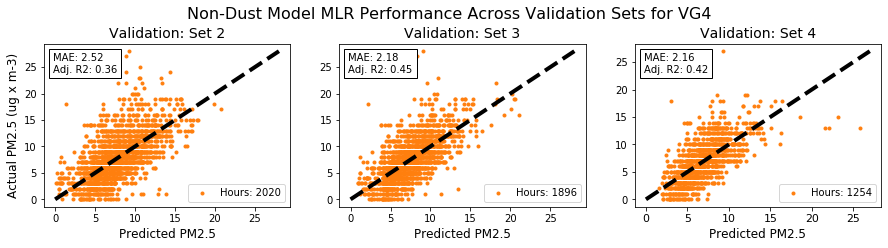

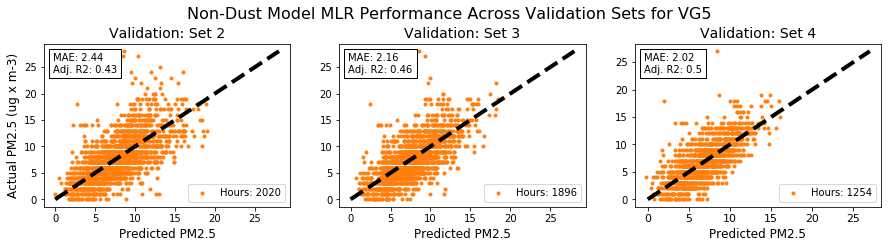

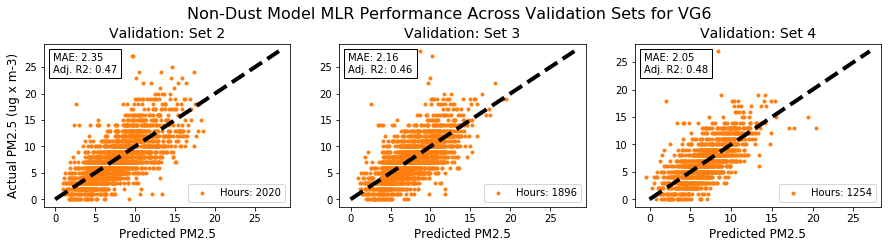

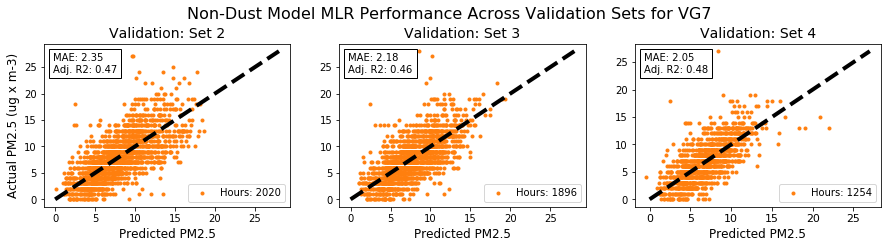

In [94]:
mae_val_nd = []
mae_test_nd = []
mae_test2_nd = []
r2_val_nd = []
r2_test_nd = []
r2_test2_nd = []

for key1, variable_group in d_nd.items():
    for key2, variable_group_val in d_nd_val.items():
        if key1 == key2:
            # Fit model and save to file in the current working directory
            trained_model = model.fit(variable_group, Y_nd)
            pkl_filename = r"C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model_{}.pkl".format(key1)
            with open(pkl_filename, 'wb') as file:
                pickle.dump(trained_model, file)

            # Load from file
            with open(pkl_filename, 'rb') as file:
                pickle_model = pickle.load(file)

            fig = plt.figure(figsize=(15,3))
            ax = fig.add_subplot(131)
            ax2 = fig.add_subplot(132)
            ax3 = fig.add_subplot(133)
            fig.suptitle('Non-Dust Model ' + model_type + ' Performance Across Validation Sets for ' + key1, size=16, y=1.05)
            ########################################################################################################
            #Metrics
            predicted = cross_val_predict(pickle_model, variable_group_val, Y_nd_val)
            squared_error = (predicted - Y_nd_val)**2
            sum_squared_error = sum(squared_error)
            predicted_mean = predicted.mean()
            squared_total = (Y_nd_val - predicted_mean)**2
            sum_squared_total = sum(squared_total)
            sum_squared_total
            n = Y_nd_val.shape[0]
            k = variable_group_val.shape[1]

            #Score
            rmse = np.sqrt(sum_squared_error/n)
            RMSE = round(rmse,2)
            Y_mean = Y_nd_val.mean()
            NRMSE = round(RMSE/Y_mean,2)
            r2 = 1 - (sum_squared_error/sum_squared_total)
            R2 = round(r2,2)
            ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
            AR2 = round(ar2,2) 
            MAE = round(sum(abs(predicted - Y_nd_val))/n,2)
            nMAE = round((sum(abs(predicted - Y_nd_val)))/n/Y_mean,2)

            #Plot
            ax.scatter(predicted, Y_nd_val, color=color_nd, label='Hours: ' + str(Y_nd_val.shape[0]), marker='.')
            ax.plot([Y_nd_val.min(), Y_nd_val.max()], [Y_nd_val.min(), Y_nd_val.max()], 'k--', lw=4)
            ax.set_xlabel('Predicted PM2.5', size=label_size)
            ax.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
            ax.set_title('Validation: ' + str(val)
                 , size=title_size)
            anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                 + 'Adj. R2: ' + str(AR2), loc=2)
            ax.add_artist(anchored_text)
            plt.xticks(fontsize=tick_size)
            ax.legend(loc=4)
            
            mae_val_nd.append(nMAE)
            r2_val_nd.append(AR2)
            
            ###########################################################################################
            for key3, variable_group_test in d_nd_test.items():
                if key1 == key3:
                    #Metrics
                    predicted = cross_val_predict(pickle_model, variable_group_test, Y_nd_test)
                    squared_error = (predicted - Y_nd_test)**2
                    sum_squared_error = sum(squared_error)
                    predicted_mean = predicted.mean()
                    squared_total = (Y_nd_test - predicted_mean)**2
                    sum_squared_total = sum(squared_total)
                    sum_squared_total
                    n = Y_nd_test.shape[0]
                    k = variable_group_test.shape[1]

                    #Score
                    rmse = np.sqrt(sum_squared_error/n)
                    RMSE = round(rmse,2)
                    Y_mean = Y_nd_test.mean()
                    NRMSE = round(RMSE/Y_mean,2)
                    r2 = 1 - (sum_squared_error/sum_squared_total)
                    R2 = round(r2,2)
                    ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
                    AR2 = round(ar2,2) 
                    MAE = round(sum(abs(predicted - Y_nd_test))/n,2)
                    nMAE = round((sum(abs(predicted - Y_nd_test)))/n/Y_mean,2)

                    #Plot
                    ax2.scatter(predicted, Y_nd_test, color=color_nd, label='Hours: ' + str(Y_nd_test.shape[0]), marker='.')
                    ax2.plot([Y_nd_test.min(), Y_nd_test.max()], [Y_nd_test.min(), Y_nd_test.max()], 'k--', lw=4)
                    ax2.set_xlabel('Predicted PM2.5', size=label_size)
#                     ax2.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
                    ax2.set_title('Validation: ' + str(test)
                         , size=title_size)
                    anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                         + 'Adj. R2: ' + str(AR2), loc=2)
                    ax2.add_artist(anchored_text)
                    plt.xticks(fontsize=tick_size)
                    ax2.legend(loc=4)
                    
                    mae_test_nd.append(nMAE)
                    r2_test_nd.append(AR2)
                    ###############################################################################################
                    for key4, variable_group_test2 in d_nd_test2.items():
                        if key1 == key4:
                            #Metrics
                            predicted = cross_val_predict(pickle_model, variable_group_test2, Y_nd_test2)
                            squared_error = (predicted - Y_nd_test2)**2
                            sum_squared_error = sum(squared_error)
                            predicted_mean = predicted.mean()
                            squared_total = (Y_nd_test2 - predicted_mean)**2
                            sum_squared_total = sum(squared_total)
                            sum_squared_total
                            n = Y_nd_test2.shape[0]
                            k = variable_group_test2.shape[1]

                            #Score
                            rmse = np.sqrt(sum_squared_error/n)
                            RMSE = round(rmse,2)
                            Y_mean = Y_nd_test2.mean()
                            NRMSE = round(RMSE/Y_mean,2)
                            r2 = 1 - (sum_squared_error/sum_squared_total)
                            R2 = round(r2,2)
                            ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
                            AR2 = round(ar2,2) 
                            MAE = round(sum(abs(predicted - Y_nd_test2))/n,2)
                            nMAE = round((sum(abs(predicted - Y_nd_test2)))/n/Y_mean,2)

                            #Plot
                            ax3.scatter(predicted, Y_nd_test2, color=color_nd, label='Hours: ' + str(Y_nd_test2.shape[0]), marker='.')
                            ax3.plot([Y_nd_test2.min(), Y_nd_test2.max()], [Y_nd_test2.min(), Y_nd_test2.max()], 'k--', lw=4)
                            ax3.set_xlabel('Predicted PM2.5', size=label_size)
#                             ax3.set_ylabel('Actual PM2.5 (ug x m-3)', size=label_size)
                            ax3.set_title('Validation: ' + str(test2)
                                 , size=title_size)
                            anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n' 
                                                 + 'Adj. R2: ' + str(AR2), loc=2)
                            ax3.add_artist(anchored_text)
                            plt.xticks(fontsize=tick_size)
                            ax3.legend(loc=4)
                    
                            mae_test2_nd.append(nMAE)
                            r2_test2_nd.append(AR2)
                            
#                             plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\Thesis_Sheets_Docs\nodust_{}_{}.png'.format(model_type, key1), bbox_inches='tight')

## Visualize Performance Across Variable Groups: Dust

In [95]:
mae_sets = np.array([mae_val, mae_test, mae_test2])
mae_sets = np.average(mae_sets, axis=0)

r2_sets = np.array([r2_val, r2_test, r2_test2])
r2_sets = np.average(r2_sets, axis=0)

mae_sets_nd = np.array([mae_val_nd, mae_test_nd, mae_test2_nd])
mae_sets_nd = np.average(mae_sets_nd, axis=0)

r2_sets_nd = np.array([r2_val_nd, r2_test_nd, r2_test2_nd])
r2_sets_nd = np.average(r2_sets_nd, axis=0)

In [96]:
mlr_mae_sets = list(mae_sets)
mlr_r2_sets = list(r2_sets)
mlr_mae=[]
mlr_r2=[]
for item in mlr_mae_sets:
    mlr_mae.append(round(item,2))
    
for item in mlr_r2_sets:
    mlr_r2.append(round(item,2))
print('mlr_mae =', mlr_mae)
print('mlr_r2 =', mlr_r2)

mlr_mae = [0.52, 0.48, 0.3, 0.3, 0.23, 0.24, 0.22]
mlr_r2 = [-0.03, 0.05, 0.67, 0.66, 0.81, 0.8, 0.82]


Text(0, 0.5, 'Adjusted R2')

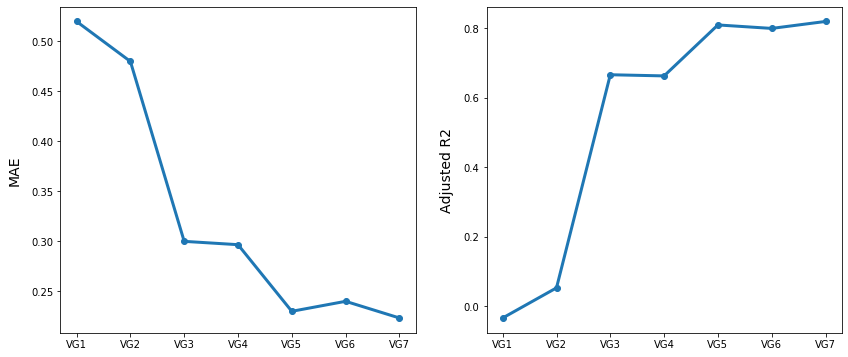

In [97]:
%matplotlib inline


variables = ['VG1','VG2','VG3','VG4','VG5','VG6', 'VG7']
# variables = ['VG1','VG2','VG3','VG4', 'VG5']


fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(variables, mae_sets, linewidth=3, marker='o')
# ax.legend()
ax.set_ylabel('MAE', fontsize=14, labelpad=10)

ax2.plot(variables, r2_sets, linewidth=3, marker='o')
ax2.set_ylabel('Adjusted R2', fontsize=14, labelpad=10)
# ax2.legend()

## Visualize Performance Across Variable Groups: Non-Dust

In [98]:
mlr_mae_sets_nd = list(mae_sets_nd)
mlr_r2_sets_nd = list(r2_sets_nd)
mlr_mae_nd=[]
mlr_r2_nd=[]
for item in mlr_mae_sets_nd:
    mlr_mae_nd.append(round(item,2))
    
for item in mlr_r2_sets_nd:
    mlr_r2_nd.append(round(item,2))
print('mlr_mae_nd =', mlr_mae_nd)
print('mlr_r2_nd =', mlr_r2_nd)

mlr_mae_nd = [0.32, 0.3, 0.3, 0.31, 0.29, 0.29, 0.29]
mlr_r2_nd = [0.37, 0.41, 0.42, 0.41, 0.46, 0.47, 0.47]


Text(0, 0.5, 'Adjusted R2')

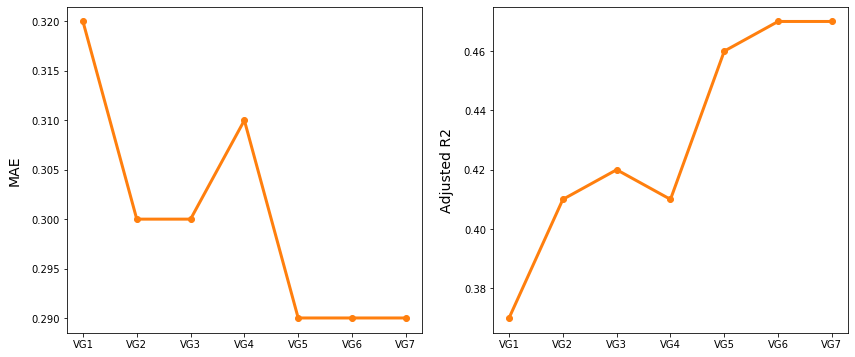

In [99]:
%matplotlib inline

variables = ['VG1','VG2','VG3','VG4','VG5','VG6', 'VG7']
# variables = ['VG1','VG2','VG3','VG4', 'VG5']

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(variables, mlr_mae_nd, linewidth=3, marker='o', color=color_nd)
# ax.legend()
ax.set_ylabel('MAE', fontsize=14, labelpad=10)

ax2.plot(variables, mlr_r2_nd, linewidth=3, marker='o', color=color_nd)
ax2.set_ylabel('Adjusted R2', fontsize=14, labelpad=10)
# ax2.legend()